Import Libraries

In [78]:
%load_ext autoreload
%autoreload 2
import pandas as pd
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

import matplotlib.pyplot as plt
import os

# set up initial path to data
DATADIR = os.path.join("sample-data","data")
game_id = 2 # let's look at sample match 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import Metrics

In [79]:
import Metrica_IO as mio
import Metrica_Viz as mviz

In [81]:
# read in the event data
events = mio.read_event_data(DATADIR,game_id)
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

Reading team: home
Reading team: away


Merge the two tracking DataFrames based on the 'Time [s]' column, which is common to both

In [82]:
tracking_data = pd.merge(tracking_away, tracking_home, on='Time [s]', how='outer')

# Sort the combined DataFrame by the 'Time [s]' column
tracking_data = tracking_data.sort_values(by='Time [s]')

# Reset the index of the combined DataFrame
tracking_data.reset_index(drop=True, inplace=True)

# fill NaN values with 0:
tracking_data.fillna(0, inplace=True)
tracking_data.drop(['ball_x_x', 'ball_y_x', 'Period_y'], axis=1, inplace=True)
tracking_data.rename(columns={'ball_x_y': 'ball_x', 'ball_y_y': 'ball_y', 'Period_x': 'Period'}, inplace=True)
tracking_data

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
0,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,0.00000,0.00000,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0
1,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,0.00000,0.00000,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0
2,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,0.00000,0.00000,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0
3,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,0.00000,0.00000,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.35076,16.40840,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0
4,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,0.00000,0.00000,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.43980,16.40772,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141151,2,5646.08,43.68366,1.14852,-1.03032,37.40000,-1.15434,3.54416,10.37528,-5.07824,-7.39138,-7.52964,-10.17388,-2.99676,-25.87036,7.87100,-3.44394,-37.40000,0.00000,0.00000,-24.53370,-8.0546,-14.03440,25.50272,-5.33604,5.73104,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,0.00000,0.00000,-9.97248,28.55864,-11.75010,-4.36084,-14.61104,-4.22824,0.00000,0.00000,-22.86844,9.62540,0.00000,0.00000,-9.71278,24.17468,1.09392,-30.29672,-23.36028,9.04400,0.0,0.0
141152,2,5646.12,43.66246,1.14852,-1.03032,37.40000,-1.17236,3.56252,10.35302,-5.10612,-7.39032,-7.52216,-10.17494,-3.02532,-25.87036,7.87100,-3.40260,-37.40000,0.00000,0.00000,-24.53370,-8.0546,-14.03440,25.50272,-5.31802,5.74600,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,0.00000,0.00000,-9.97248,28.55864,-11.69710,-4.34860,-14.61104,-4

In [83]:
# dimensions of the field: 105x68 meters.

home_moments = tracking_data[((tracking_data['ball_x'] > 26.25) & (tracking_data['ball_x'].shift(1) <= 26.25) & (tracking_data['Period'] == 1)) | ((tracking_data['ball_x'] < -26.25) & (tracking_data['ball_x'].shift(1) >= -26.25) & (tracking_data['Period'] == 2))]
home_moments.columns

Index(['Period', 'Time [s]', 'Away_25_x', 'Away_25_y', 'Away_15_x',
       'Away_15_y', 'Away_16_x', 'Away_16_y', 'Away_17_x', 'Away_17_y',
       'Away_18_x', 'Away_18_y', 'Away_19_x', 'Away_19_y', 'Away_20_x',
       'Away_20_y', 'Away_21_x', 'Away_21_y', 'Away_22_x', 'Away_22_y',
       'Away_23_x', 'Away_23_y', 'Away_24_x', 'Away_24_y', 'Away_26_x',
       'Away_26_y', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')

In [84]:
home_moments.shape

(120, 56)

In [85]:
home_moments.columns.get_loc('Home_11_x')

26

Find Home Team High Pressure moment #1

In [86]:
import numpy as np

a_players = home_moments.columns[2:24:2]
h_players = home_moments.columns[26:52:2]
ball_columns = ['ball_x', 'ball_y']

min_distances = []
counter = 0

# Loop through each row and calculate the distance for each player
for index, row in home_moments.iterrows():
    distances_away = []
    distances_home = []
    ball_x = row['ball_x']
    ball_y = row['ball_y']

    for a_player in a_players:
        # Get the index of the current player column
        a_index = row.index.get_loc(a_player)
        away_x = row.iloc[a_index]
        away_y = row.iloc[a_index + 1]

        # Calculate Euclidean distance
        distance_away = np.sqrt((away_x - ball_x)**2 + (away_y - ball_y)**2)
        distances_away.append(distance_away)

    for h_player in h_players:
        # Get the index of the current player column
        h_index = row.index.get_loc(h_player)
        home_x = row.iloc[h_index]
        home_y = row.iloc[h_index + 1]

        # Calculate Euclidean distance
        distance_home = np.sqrt((home_x - ball_x)**2 + (home_y - ball_y)**2)
        distances_home.append(distance_home)
    
    away_min_dist = np.min(distances_away)
    home_min_dist = np.min(distance_home)
    # Find the minimum distance for the current row
    if home_min_dist < away_min_dist :
        home_moments.drop(index, inplace=True)

c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [87]:
home_moments.shape

(117, 56)

In [88]:
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN


Find the exact event before the high pressure moment happen

In [89]:
moments_event = pd.DataFrame(columns=events.columns)

for index, row in home_moments.iterrows():
    for e_index, e_row in events.iterrows():

        # Check if it's not the first row to avoid IndexError for previous row
        if e_index > 0:
            current_start_time = e_row['Start Time [s]']
            previous_start_time = events.iloc[e_index - 1]['Start Time [s]']
            home_time = row['Time [s]']

            # Check both the current and previous start times against home_time
            if current_start_time >= home_time and previous_start_time < home_time:
                moments_event = moments_event.append(events.iloc[e_index - 1], ignore_index=True)

moments_event
moments_event.to_csv('moments_event.csv', index=False)


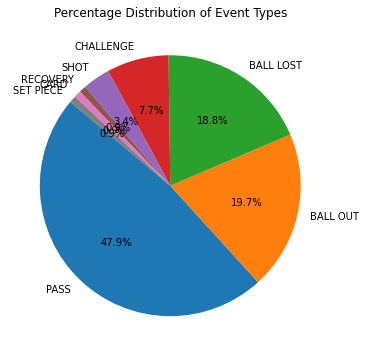

In [106]:
# Pie Chart for percentage distribution of event types
event_type_counts = moments_event['Type'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(event_type_counts, labels = event_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Event Types')
plt.show()

Fill NA Subtype, To

In [93]:
# Imputing missing values with 'Unknown'
moments_event['Subtype'].fillna('Unknown', inplace=True)
moments_event['To'].fillna('Unknown', inplace=True)

# Verify the imputation
imputation_check = moments_event[['Subtype', 'To']].isnull().sum()
imputation_check

Subtype    0
To         0
dtype: int64

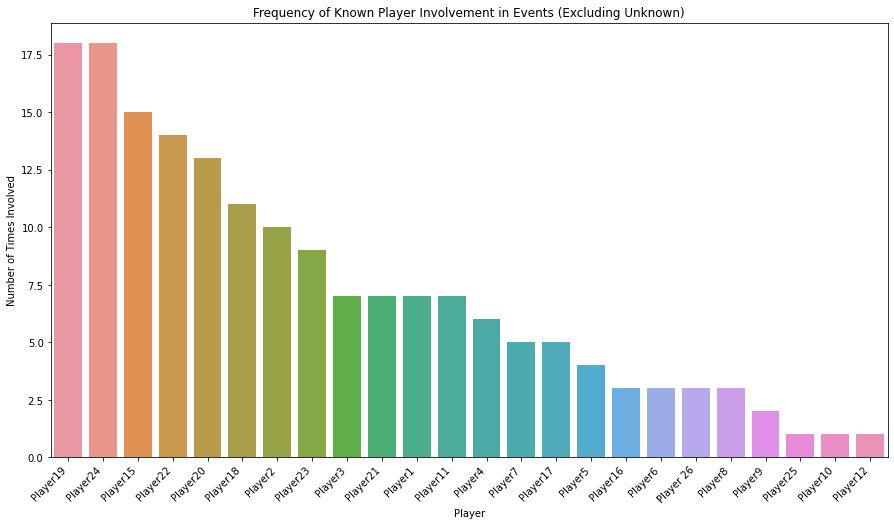

In [113]:
import seaborn as sns

combined_players = moments_event['From'].append(moments_event['To'])
player_counts = combined_players.value_counts()

# Creating a DataFrame for player counts
player_counts_df = pd.DataFrame.from_dict(player_counts).reset_index()
player_counts_df.columns = ['Player', 'Count']

# Sorting the DataFrame by player counts
player_counts_df_sorted = player_counts_df.sort_values(by='Count', ascending=False)

# Excluding 'Unknown' from the player counts
player_counts_excluding_unknown = player_counts.drop('Unknown')

# Creating a DataFrame for the updated player counts
player_counts_df = pd.DataFrame.from_dict(player_counts_excluding_unknown).reset_index()
player_counts_df.columns = ['Player', 'Count']

# Sorting the DataFrame by player counts
player_counts_df_sorted = player_counts_df.sort_values(by='Count', ascending=False)

# Plotting the histogram
plt.figure(figsize=(15, 8))
sns.barplot(x='Player', y='Count', data=player_counts_df_sorted)
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Known Player Involvement in Events (Excluding Unknown)')
plt.xlabel('Player')
plt.ylabel('Number of Times Involved')
plt.show()

Not Verified , Clustering

In [109]:
from sklearn.preprocessing import OneHotEncoder

# Selecting the relevant columns for clustering
features = moments_event[['Type', 'Subtype', 'From', 'To']]

# Applying one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(features)

# Convert the encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(features.columns))

# Display the first few rows of the encoded DataFrame
encoded_df.head()

,Type_BALL LOST,Type_BALL OUT,Type_CARD,Type_CHALLENGE,Type_PASS,Type_RECOVERY,Type_SET PIECE,Type_SHOT,Subtype_AERIAL-LOST,Subtype_CLEARANCE,Subtype_CROSS,Subtype_GROUND,Subtype_GROUND-FAULT-LOST,Subtype_GROUND-LOST,Subtype_GROUND-WON,Subtype_HEAD,Subtype_HEAD-CLEARANCE,Subtype_HEAD-INTERCEPTION,Subtype_INTERCEPTION,Subtype_OFF TARGET-HEAD-OUT,Subtype_OFF TARGET-OUT,Subtype_TACKLE-LOST,Subtype_THROW IN,Subtype_Unknown,Subtype_YELLOW,From_Player 26,From_Player1,From_Player10,From_Player11,From_Player15,From_Player16,From_Player17,From_Player18,From_Player19,From_Player2,From_Player20,From_Player21,From_Player22,From_Player23,From_Player24,From_Player25,From_Player3,From_Player4,From_Player5,From_Player6,From_Player7,From_Player8,From_Player9,To_Player 26,To_Player1,To_Player11,To_Player12,To_Player15,To_Player18,To_Player19,To_Player2,To_Player20,To_Player22,To_Player23,To_Player24,To_Player3,To_Player7,To_Unknown
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(encoded_df)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [104]:
# Performing K-Means clustering with 3 and 4 clusters
kmeans_3_clusters = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_4_clusters = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Fitting the models
kmeans_3_clusters.fit(encoded_df)
kmeans_4_clusters.fit(encoded_df)

# Adding the cluster labels to the original dataframe for analysis
moments_event['Cluster_3'] = kmeans_3_clusters.labels_
moments_event['Cluster_4'] = kmeans_4_clusters.labels_

# Display the first few rows of the dataframe with the cluster labels
moments_event.head()


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Cluster_3,Cluster_4
0,Away,BALL LOST,INTERCEPTION,1,1392,55.68,1429,57.16,Player24,Unknown,0.72,0.04,0.87,0.13,2,2
1,Away,BALL LOST,INTERCEPTION,1,1392,55.68,1429,57.16,Player24,Unknown,0.72,0.04,0.87,0.13,2,2
2,Home,PASS,Unknown,1,2511,100.44,2546,101.84,Player4,Player3,0.61,0.97,0.76,0.87,1,0
3,Home,PASS,Unknown,1,3248,129.92,3311,132.44,Player3,Player11,0.58,0.27,0.86,0.45,1,0
4,Away,PASS,Unknown,1,14189,567.56,14234,569.36,Player15,Player19,0.62,0.99,0.75,0.86,1,0
